In [122]:
# Importing the important libraries needed for Data Manipulation, classification and Analysis

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn import metrics
import pandas as pd
import numpy as np
import re
from math import isnan
import matplotlib.pyplot as plt
%matplotlib inline
digits = load_digits()


# Importing and merging data

In [91]:
# Import data using predefined file path
data_file1 = 'train.csv'
df_train = pd.read_csv(data_file1)
# Importing data using user defined file path
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

# Merge the dataset using PassengerId as a key and using right join
# (all the rows from df_gender_submission and only matching rows from df_test)
result = pd.merge(df_gender_submission, df_test,
                  how='right', on=['PassengerId'])
# Concatenating df_train and result dataframe
train_df = pd.concat([df_train, result], ignore_index=True)


# Initial exploration

In [92]:
# Check first 3 rows of the data
train_df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [93]:
# Print first few rows and last few rows
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [94]:
# Check data types
train_df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Combining the result from the previous step, when using *head* method of the Dataframe class,
it is clear that all the *object* data types are *Strings*

In [95]:
# Print number of rows and columns
train_df.shape


(1309, 12)

In [96]:
print('\tData description')
print('*****************************************')

''' Within the three quatition (i.e ''' '''), it is posible to display a pragraph as it is.
Therefore new line can be enter typing a sentence in a new line or using \n'''
print('''•\tPassengerId: Id of every passenger.\n•\tSurvived: This feature have value 0 and 1. 0 for not survived and 1 for survived.
•\tPclass: There are 3 classes: Class 1, Class 2 and Class 3.\n•\tName: Name of passenger.\n•\tSex: Gender of passenger.
•\tAge: Age of passenger.\n•\tSibSp: Indication that passenger have siblings and spouse.\n•\tParch: Whether a passenger is alone or have family.
•\tTicket: Ticket number of passenger.\n•\tFare: Indicating the fare.\n•\tCabin: The cabin of passenger.\n•\tEmbarked: The embarked category''')


	Data description
*****************************************
•	PassengerId: Id of every passenger.
•	Survived: This feature have value 0 and 1. 0 for not survived and 1 for survived.
•	Pclass: There are 3 classes: Class 1, Class 2 and Class 3.
•	Name: Name of passenger.
•	Sex: Gender of passenger.
•	Age: Age of passenger.
•	SibSp: Indication that passenger have siblings and spouse.
•	Parch: Whether a passenger is alone or have family.
•	Ticket: Ticket number of passenger.
•	Fare: Indicating the fare.
•	Cabin: The cabin of passenger.
•	Embarked: The embarked category


## Exploring data to identify Anomalies/ Missing Data


In [97]:
# check the unique values count
print('Number of unique values in each columns')
for col in train_df.columns:
    print(str(col) + '   ' + str(train_df[col].nunique()))
print(
    f'It is clear when look at the number of unique values, that there are {train_df.PassengerId.nunique()} unique values in the PassengerId column. However, only {train_df.PassengerId.nunique()} unique values in the Name column. This raise the suspision that there may be duplicate entry in the data set')


Number of unique values in each columns
PassengerId   1309
Survived   2
Pclass   3
Name   1307
Sex   2
Age   98
SibSp   7
Parch   8
Ticket   929
Fare   281
Cabin   186
Embarked   3
It is clear when look at the number of unique values, that there are 1309 unique values in the PassengerId column. However, only 1309 unique values in the Name column. This raise the suspision that there may be duplicate entry in the data set


In [98]:
# TODO %%%%%%%%%%%%%% Need to write code to check and remove duplicate values


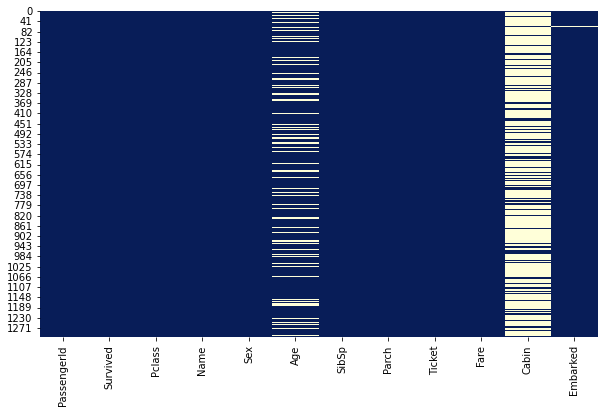

In [99]:
# insert this plot at the begining of the data when we still had missing values, this is a graphical presentation of the variable where there is missing data in the data set

# the figsize help zoom our plot to give a better visible view
plt.subplots(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap="YlGnBu_r")

categorical_variable = ['Survived', 'Sex',
                        'Pclass', 'SibSp', 'Parch', 'Embarked']


Text(0.5, 1.0, 'Total Missing Value (%)')

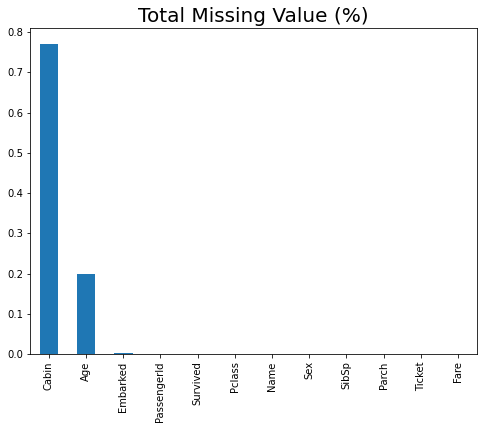

In [100]:
# Plotting the missing values of the Title column
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [101]:
# Percentage of rows missing in each column
for column in train_df.columns:
    percentage = train_df[column].isnull().mean()
    print(f'{column}: {round(percentage*100,4)}%')


PassengerId: 0.0%
Survived: 0.0%
Pclass: 0.0%
Name: 0.0%
Sex: 0.0%
Age: 20.0917%
SibSp: 0.0%
Parch: 0.0%
Ticket: 0.0%
Fare: 0.0764%
Cabin: 77.4637%
Embarked: 0.1528%


/Users/prasad/opt/anaconda3/envs/HelloWorld/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/prasad/opt/anaconda3/envs/HelloWorld/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/prasad/opt/anaconda3/envs/HelloWorld/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

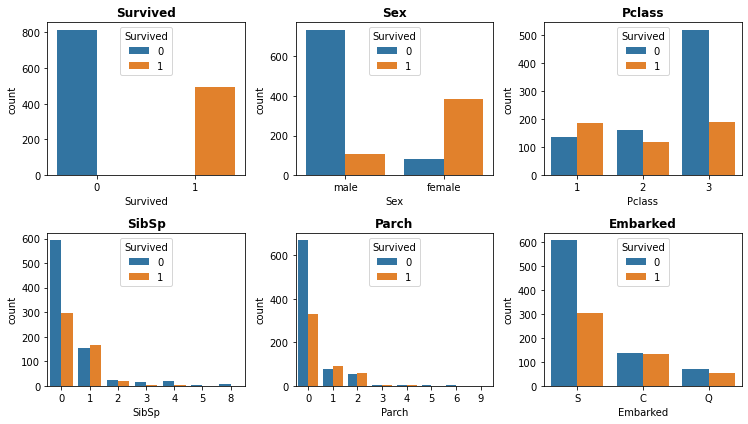

In [102]:
'Our desired number of plot row and column size'
categorical_plot_nrows = 2
categorical_plot_ncols = 3

fig, axs = plt.subplots(categorical_plot_nrows, categorical_plot_ncols, figsize=(
    categorical_plot_ncols*3.5, categorical_plot_nrows*3))

for r in range(0, categorical_plot_nrows):
    for c in range(0, categorical_plot_ncols):
        i = r*categorical_plot_ncols+c
        ax = axs[r][c]
        sns.countplot(train_df[categorical_variable[i]],
                      hue=train_df["Survived"], ax=ax)
        ax.set_title(categorical_variable[i], fontsize=12, fontweight="bold")
        ax.legend(title="Survived", loc='upper center')

plt.tight_layout()


## Transforming the column values
### Transforming Survived and Pclass columns from integer to String
Values are transformed form numerical values to categotical values as it is easier to understand the data in the exploratary analysis.
Also, after the transformation, graph lables become more discriptive and easier to understand.

### Renaming Embarked column values to their proper Embarcation port
This will make data more understandable in data exploration.


In [103]:
# Survived column values: maped 1 -> Survived and 0 -> Deceased
train_df.loc[train_df['Survived'] == 0, 'Survived'] = 'Deceased'
train_df.loc[train_df['Survived'] == 1, 'Survived'] = 'Survived'
train_df['Survived'].head()


0    Deceased
1    Survived
2    Survived
3    Survived
4    Deceased
Name: Survived, dtype: object

In [104]:
# Pclass column values: maped 1 -> First Class, 2 -> Second Class and 3 -> Third Class
train_df.loc[train_df['Pclass'] == 1, 'Pclass'] = 'First Class'
train_df.loc[train_df['Pclass'] == 2, 'Pclass'] = 'Second Class'
train_df.loc[train_df['Pclass'] == 3, 'Pclass'] = 'Third Class'
train_df['Pclass'].head()


0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Pclass, dtype: object

In [105]:
# Embarked column values: maped C -> Cherbourg, Q -> Queenstown and S -> Southampton
train_df.loc[train_df['Embarked'] == 'C', 'Embarked'] = 'Cherbourg'
train_df.loc[train_df['Embarked'] == 'Q', 'Embarked'] = 'Queenstown'
train_df.loc[train_df['Embarked'] == 'S', 'Embarked'] = 'Southampton'
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Deceased,Third Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Survived,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Survived,Third Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Survived,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,Deceased,Third Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


In [106]:
# Can drop PasengerId column as it does not hold valuble information for the analysis
train_df.drop('PassengerId', axis=1)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Deceased,Third Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,Survived,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,Survived,Third Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,Survived,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,Deceased,Third Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
1304,Deceased,Third Class,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,Southampton
1305,Survived,First Class,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,Cherbourg
1306,Deceased,Third Class,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton
1307,Deceased,Third Class,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,Southampton


## Basic statistics before fixing data for missing values

In [107]:
# The average age of passengers?
train_df['Age'].mean()


29.881137667304014

In [108]:
# TODO%%%%%%%%%%%% WE NEED CHECH THIS @Bassey
# Median Age and Ticket fare price of Pax
#train_df[['Age', 'Fare']].median()
# train_df.describe(include='all')

# instead of using above predifined 'describe function' we can combined aggregating statistics
train_df.agg(
    {
        'Age': ['min', 'max', 'mean', 'median', 'skew'],
        'Fare': ['min', 'max', 'mean', 'median', 'skew'],
    })


,Age,Fare
min,0.170000,0.000000
max,80.000000,512.329200
mean,29.881138,33.295479
median,28.000000,14.454200
skew,0.407675,4.367709


In [109]:
# counting by group
train_df.groupby('Pclass')['Pclass'].count()


Pclass
First Class     323
Second Class    277
Third Class     709
Name: Pclass, dtype: int64

In [110]:
# TODO Do we want all of the below code for our final report@ Bassey
train_df.isnull()  # is any missing values in dataframe
train_df.isnull().any()  # is any missing values across columns
train_df.isnull().sum().sum()   # count of missing values of the entire dataframe
# count of missing values across columns
count_NAN = len(train_df) - train_df.count()
count_NAN

max_missing = 0
for i in range(len(train_df.index)):  # count of missing values across rows
    #print('NAN in row ', i , ' : ', train_df.iloc[i].isnull().sum())
    missing_current_row = train_df.iloc[i].isnull().sum()
    if(max_missing < missing_current_row):
        max_missing = missing_current_row

print('maximum null values in a row : ', max_missing, '.',
      '\nTherefore, dropping rows containing missing values are disadvantageous')
print()


maximum null values in a row :  2 . 
Therefore, dropping rows containing missing values are disadvantageous



In [111]:
# counting of missing values of a particular column
train_df.Age.isnull().sum()


263

In [112]:
# count of missing values of column by group
'''count of missing values of column by group
 Because we dont havve missing values in sex all the missing values is coming from Age'''
train_df.groupby(['Sex'])['Age'].apply(lambda x: x.isnull().sum())


Sex
female     78
male      185
Name: Age, dtype: int64

## Fixing missing values

In [113]:
# Replacing the na in age and Fare column with mean
train_df['Age'] = train_df['Age'].fillna(round(train_df['Age'].mean()))
train_df['Fare'] = train_df['Fare'].fillna(round(train_df['Fare'].mean()))

# checking if there are any remaining missing value
print('Number of missing values remaining in Age column is',
      train_df.Age.isnull().sum())
print('Number of missing values remaining in Fare column is',
      train_df.Fare.isnull().sum())


Number of missing values remaining in Age column is 0
Number of missing values remaining in Fare column is 0


In [114]:
# Replace missing values with mode of the Embarked column
train_df['Embarked'] = train_df['Embarked'].fillna(
    train_df['Embarked'].mode()[0])
print('Number of missing values remaining in Embarked column is',
      train_df.Fare.isnull().sum())


Number of missing values remaining in Embarked column is 0


In [115]:
# See if there is still any missing data in train dataset
print('Missing value remaining in the dataset', train_df.isna().sum().max())
print('Missing values of the Cabin column', train_df.Cabin.isnull().sum())
print('IT is clear that all the remaining missing values are from Cabin column. At his point, not going to impute missing values in Cabin variable as there are more than 60% of the values are missing.')


Missing value remaining in the dataset 1014
Missing values of the Cabin column 1014
IT is clear that all the remaining missing values are from Cabin column. At his point, not going to impute missing values in Cabin variable as there are more than 60% of the values are missing.


## Data visualisation

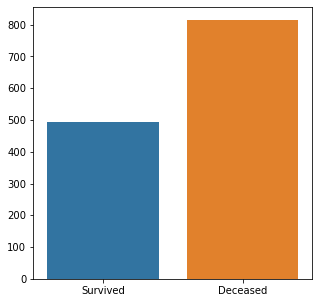

In [116]:
plt.figure(figsize=(5, 5))
survival_labels = ["Survived", "Deceased"]
survival_counts = [train_df.Survived.value_counts(
)[1], train_df.Survived.value_counts()[0]]
sns.barplot(x=survival_labels, y=survival_counts)
plt.show()

ValueError: Could not interpret input 'Survived'

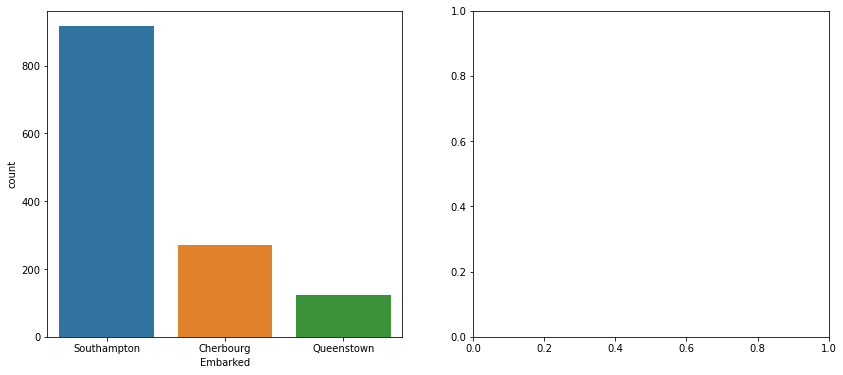

In [117]:
train_data_clean_embarked = train_df.dropna(subset=['Embarked'])
embarked = train_data_clean_embarked.groupby('Embarked').mean()
embarked['Count'] = train_data_clean_embarked['Embarked'].value_counts()
embarked


fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(14,6))

sns.countplot(x='Embarked', data=train_data_clean_embarked, order=['Southampton','Cherbourg','Queenstown'], ax=axis1)
sns.barplot(x=embarked.index, y='Survived', data=embarked, order=['Southampton','Cherbourg','Queenstown'], ax=axis2)

In [ ]:
'''
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_df) plt.ylabel("Survival Rate") plt.title("Survival as function of Pclass and Sex") plt.show()

sns.barplot(x='Embarked', y='Survived', data=train_df) plt.ylabel("Survival Rate") plt.title("Survival as function of Embarked Port") plt.show()

sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train_df) plt.ylabel("Survival Rate") plt.title("Survival as function of Embarked Port & Class") plt.show()

sns.countplot(x='Embarked', hue='Pclass', data=train_df) plt.title("Count of Passengers as function of Embarked Port") plt.show()

sns.boxplot(x='Embarked', y='Age', data=train_df) plt.title("Age distribution as function of Embarked Port") plt.show()

sns.boxplot(x='Embarked', y='Fare', data=train_df) plt.title("Fare distribution as function of Embarked Port") plt.show()

fig, ax = plt.subplots(figsize=(13, 7)) sns.violinplot(x="Pclass", y="Age", hue='Survived', data=train_df, split=True, bw=0.05, palette=swarm_color, ax=ax) plt.title('Survivals for Age and Pclass ') plt.show()

swarm_color = ["red", "green"] fig, ax = plt.subplots(figsize=(13, 7)) sns.swarmplot(x='Pclass', y='Age', hue='Survived', split=True, data=train_df, palette=swarm_color, size=7, ax=ax) plt.title('Survivals for Age and Pclass ') plt.show()

g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train_df, kind="swarm", split=True, palette=swarm_color, size=7, aspect=.9, s=7)

y="Age", hue="Survived", col="Sex", data=train_df, kind="violin", split=True, bw=0.05, palette=swarm_color, size=7, aspect=.9, s=7)'''

SyntaxError: invalid syntax (495923011.py, line 1)

In [ ]:
'''sns.barplot(x='Pclass', y='Survived', data=train_df) plt.ylabel("Survival Rate") plt.title("Survival as function of Pclass") plt.show()'''

## Analysing familysize

### Visusalise surviving families using title

In [ ]:
df_train = train_df

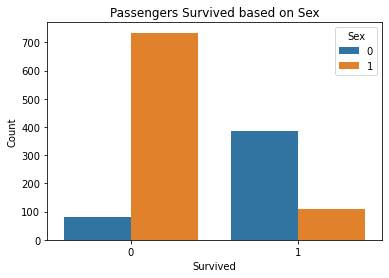

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=df_train).set(title="Passengers Survived based on Sex", ylabel="Count");

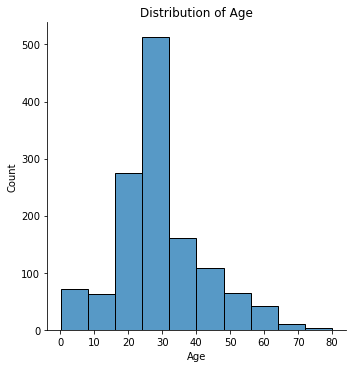

In [ ]:
sns.displot(df_train['Age'], kde=False, bins=10).set(title="Distribution of Age")

Text(0.5, 1.0, 'Total Missing Value (%)')

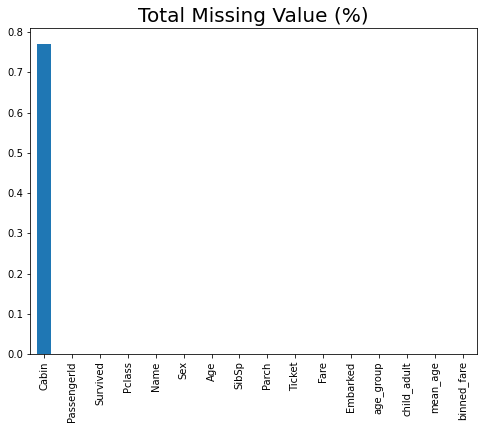

In [ ]:
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df_train['Title'], df_train['Sex']).T

Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
1,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [ ]:
df_train['Title'] = df_train['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady',
     'Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],'Rare')
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().round(3)

,Title,Survived
0,Master,0.377
1,Miss,0.788
2,Mr,0.107
3,Mrs,0.868
4,Rare,0.412


In [ ]:
T=df_train.groupby(['Title'])['Age'].mean().round(3).values
T

array([ 8.698, 23.356, 31.729, 36.036, 41.912])

In [ ]:
df_train['Title'] = df_train['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady',
     'Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],'Rare')
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().round(3)

,Title,Survived
0,Master,0.377
1,Miss,0.788
2,Mr,0.107
3,Mrs,0.868
4,Rare,0.412


In [ ]:
df_train.groupby(['Title'])['Age'].mean().round(3)

Title
Master     8.698
Miss      23.356
Mr        31.729
Mrs       36.036
Rare      41.912
Name: Age, dtype: float64

In [ ]:
T=df_train.groupby(['Title'])['Age'].mean().round(3).values
T

array([ 8.698, 23.356, 31.729, 36.036, 41.912])

In [ ]:
df_train['Title_Code']=df_train['Title'].astype('category').cat.codes

In [ ]:
Ti_pred = df_train.groupby('Title')['Age'].mean().values
df_train['Ti_Age'] = df_train['Age']

for i in range(len(df_train['Title_Code'].unique())):
    df_train.loc[(df_train.Age.isnull()) & (df_train.Title_Code == i),'Ti_Age'] = Ti_pred[i]
    
df_train['Ti_Age'] = df_train['Ti_Age'].astype('int')

df_train['Ti_Minor'] = ((df_train['Ti_Age']) < 18.0) * 1

/Users/prasad/opt/anaconda3/envs/HelloWorld/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


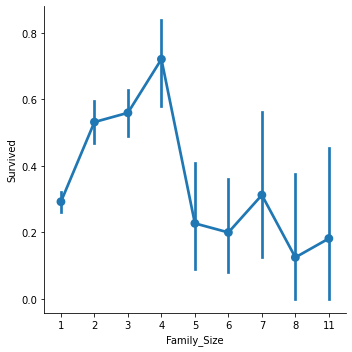

In [ ]:
df_train['Family_Size']=df_train['SibSp']+df_train['Parch']+1
g = sns.factorplot(data=df_train,x='Family_Size', y ='Survived')

Interprit the graph

In [ ]:
### Random Classifier for family size


In [118]:
X1 = df_train.drop(labels = ['Survived','PassengerId'], axis = 1)
Y1 = df_train['Survived']

In [119]:
x1 = df_train.drop(['Survived', 'PassengerId'], axis = 1)
y1 = df_train['Survived']
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=3)

In [124]:
num_col=[0,1,2,3,4,5,6,7,8]

In [125]:
trans = make_column_transformer ((StandardScaler(),num_col),
                                 remainder= 'passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8])])

In [126]:
model = KNeighborsClassifier(11)
pipe=make_pipeline(trans,model)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [127]:
model = KNeighborsClassifier(11)
pipe=make_pipeline(trans,model)
pipe
pipe.fit(x_train,y_train)

ValueError: could not convert string to float: 'Rugg, Miss. Emily'

In [120]:
Features=['Pclass','Sex_Code','Fare_Code','Embarked_Code','Ti_Minor']
Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Model.fit(X1[Features],Y1)
print("oob_score: %.5f" %(Model.oob_score_))

KeyError: "['Sex_Code', 'Fare_Code', 'Embarked_Code', 'Ti_Minor'] not in index"

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

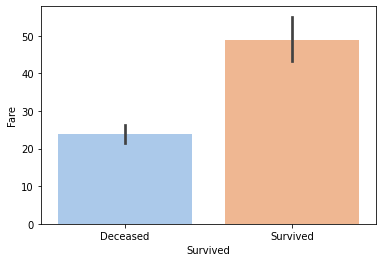

In [123]:
sns.barplot(x= 'Survived', y= 'Fare', data= train_df, palette= 'pastel')

In [ ]:
# data transformation on Age column
# Grouping age values

train_df.loc[train_df['Age'] <= 1, 'age_group'] = 'baby'
train_df.loc[train_df['Age'].between(1, 3), 'age_group'] = 'todlers'
train_df.loc[train_df['Age'].between(4, 10), 'age_group'] = 'children'
train_df.loc[train_df['Age'].between(11, 19), 'age_group'] = 'teenage'
train_df.loc[train_df['Age'].between(20, 35), 'age_group'] = 'yadult'
train_df.loc[train_df['Age'].between(36, 60), 'age_group'] = 'adult'
train_df.loc[train_df['Age'] > 60, 'age_group'] = 'elder'

# Age grouping to two groups Child or Adult
train_df.loc[train_df['Age'] <= 18, 'child_adult'] = 'child'
train_df.loc[train_df['Age'] > 18, 'child_adult'] = 'adult'

# Age grouping using mean values
train_df.loc[train_df['Age'].round() <= 10, 'mean_age'] = 5
train_df.loc[train_df['Age'].round().between(11, 20), 'mean_age'] = 15
train_df.loc[train_df['Age'].round().between(21, 30), 'mean_age'] = 25
train_df.loc[train_df['Age'].round().between(31, 40), 'mean_age'] = 35
train_df.loc[train_df['Age'].round().between(41, 50), 'mean_age'] = 45
train_df.loc[train_df['Age'].round().between(51, 60), 'mean_age'] = 55
train_df.loc[train_df['Age'].round().between(61, 70), 'mean_age'] = 65
train_df.loc[train_df['Age'] > 70, 'mean_age'] = 75


In [ ]:
print('Maximum of Fare: ', df_train['Fare'].max())
print('Minimum of Fare: ', df_train['Fare'].min())
print('Mean of the Fare: ', train_df['Fare'].mean())

# Fare grouping using mean values of the range
train_df.loc[train_df['Fare'].round() <= 100, 'binned_fare'] = 50
train_df.loc[train_df['Fare'].round().between(101, 200), 'binned_fare'] = 150
train_df.loc[train_df['Fare'].round().between(201, 300), 'binned_fare'] = 250
train_df.loc[train_df['Fare'].round().between(301, 400), 'binned_fare'] = 350
train_df.loc[train_df['Fare'].round().between(401, 500), 'binned_fare'] = 450
train_df.loc[train_df['Fare'] > 500, 'binned_fare'] = 550


Maximum of Fare:  512.3292
Minimum of Fare:  0.0
Mean of the Fare:  33.29525355233006


In [ ]:
# Calculate variance using a function

def variance_calculator(df_variable):
    sum_variable = 0
    for value in df_variable:
        if (isnan(value) != True):
            sum_variable += value
    mean = sum_variable/len(df_variable)

    sum_of_squares = 0
    for value in df_variable:
        if (isnan(value) != True):
            sum_of_squares += value ** 2
    mean_squares = sum_of_squares/len(df_variable)

    return mean_squares - mean**2

# The above calculation can also be done using the method numpy.var
# np.var(df_variable)


In [ ]:
print(
    f'Variance of Fare calculated using the defined function {round(variance_calculator(train_df.Fare),2)}')
print(
    f'Variance of Fare calculated using numpy function {round(np.var(train_df.Fare),2)}')


Variance of Fare calculated using the defined function 2674.87
Variance of Fare calculated using numpy function 2674.87


Family class with parent and children

SibSp: number of siblings/spouse

Parch: number of childre/parents

With the number of siblings or spouse and the number of children or parents we can create new class called Family.

In [ ]:
# Get pasengers who travel with family (either siblings,spouse, childre or parents)
# Copy rows which has values for either SibSp column or Parch
train_data_families = train_df.loc[(train_df['SibSp'] > 0) | (
    train_df['Parch'] > 0)][['Survived', 'Name', 'Sex', 'Age', 'Ticket', 'Pclass']]
train_data_families


,Survived,Name,Sex,Age,Ticket,Pclass
0,Deceased,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,Third Class
1,Survived,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,First Class
3,Survived,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,First Class
7,Deceased,"Palsson, Master. Gosta Leonard",male,2.0,349909,Third Class
8,Survived,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,Third Class
...,...,...,...,...,...,...
1297,Deceased,"Ware, Mr. William Jeffery",male,23.0,28666,Second Class
1298,Deceased,"Widener, Mr. George Dunton",male,50.0,113503,First Class
1300,Survived,"Peacock, Miss. Treasteall",female,3.0,SOTON/O.Q. 3101315,Third Class
1302,Survived,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,19928,First Class


In [ ]:
def extract_last_name(x):
    # String x will split by ',' and take the first element in the resulting list.
    # Then any whitespaces at the front and end of the first element will be truncated and returned
    return x.split(",")[0].strip()


In [ ]:
train_data_families['LastName'] = train_data_families.Name.apply(
    extract_last_name)
train_data_families.to_csv('family.csv')


### Person Class

Creating a Person class to store pasengers traveling with family.Using the dataset created by filtering rows with non-zero values for variables SibSp(number of siblings/spouse) and Parch(number of childre/parents).

In [ ]:
class Person:

    def __init__(self, survival, full_name, sex, age, ticket, last_name):
        self.last_name = last_name
        self.ticket = ticket
        self.full_name = full_name
        self.survival = survival
        self.age = age
        self.sex = sex


In [ ]:
# Create a list to hold person objects
list_of_pasengers = []
'''
This code is written by us. However, as DataFrame object alredy has a similar method, desided to use it to improve performance.
# Create list of tuples with selected column data
with_family_list = list(zip(train_data_families["Survived"], train_data_families["Name"], train_data_families["Sex"],
train_data_families["Age"], train_data_families["Ticket"], train_data_families["LastName"]))

for item in with_family_list:
    p = Person(item[0], item[1], item[2], item[3], item[4], item[5])
    list_of_pasengers.append(p)
'''

for row in train_data_families.itertuples():
    p = Person(row[1], row[2], row[3], row[4], row[5], row[6])
    list_of_pasengers.append(p)

# Just a test
print(list_of_pasengers[6].last_name)
print(list_of_pasengers[6].full_name)
print(list_of_pasengers[6].ticket)
print(list_of_pasengers[6].survival)
print(list_of_pasengers[6].sex)
print(list_of_pasengers[6].age)


Third Class
Sandstrom, Miss. Marguerite Rut
PP 9549
Survived
female
4.0


In [ ]:
print(len(list_of_pasengers))


519


When only last names are match to group families, there can be different families with same last names.
Therefore, a variable created with ticket number  and last name used to identify families traveling together.

In [ ]:
# Creating a dictionary to store family members
families_dict = {}
for p in list_of_pasengers:
    # variable containing lastname and ticket number passed as key to the dictionary
    key = f'{p.last_name}_{p.ticket}'
    # If there is already an entry for a family person object will append to the family members list
    # Otherwise new list created with the person object
    if (key in families_dict):
        families_dict[key].append(p)
    else:
        families_dict[key] = [p]


In [ ]:
print(f'Number of members traveled with family is {len(families_dict)}')


Number of members traveled with family is 230


In [ ]:
# create a dictionary for family who traveled as a group
family_group_dict = {}
# If the family has more than one member they are added to another dictionary
for key, value in families_dict.items():
    if len(value) > 1:
        family_group_dict[key] = value

print(f'Number of families traveled together is {len(family_group_dict)}')


Number of families traveled together is 178


Calculate the percentage of adult males and females survived in families

In [ ]:
total_male = 0
total_female = 0
total_children = 0
number_f_adult_s = 0
number_m_adult_s = 0
number_child_s = 0
# Each key value pair represent a family
# Each value in the families_dict is a list family members
for key in family_group_dict:
    #family_mem_list = family_group_dict[key]
    for person in family_group_dict[key]:
        if person.age < 18:
            total_children += 1
            if person.survival == 'Survived':
                number_child_s += 1
        else:
            if (person.sex == "male"):
                total_male += 1
                if(person.survival == 'Survived'):
                    number_m_adult_s += 1
            else:
                total_female += 1
                if(person.survival == 'Survived'):
                    number_f_adult_s += 1

print('When a pasenger traveled as a family')
print("percentage of females survived " +
      str(round(100 * number_f_adult_s/total_female)) + '%')
print("percentage of males survived " +
      str(round(100 * number_m_adult_s/total_male)) + '%')
print("percentage of children survived " +
      str(round(100 * number_child_s/total_children)) + '%')


When a pasenger traveled as a family
percentage of females survived 83%
percentage of males survived 13%
percentage of children survived 55%


## Building a Random Forest Classifier
Reference: https://www.freecodecamp.org/news/how-to-use-the-tree-based-algorithm-for-machine-learning/

### Random Forest Classifier with variables
- Pclass
- Sex
- SibSp
- Parch
- mean_age

In [ ]:
# Create a copy of the dataset because some columns are transforming to numeric
rf_df = train_df
# Convert variables to numeric values
rf_df['Sex'] = rf_df['Sex'].replace(['female', 'male'], [0, 1])

train_df.loc[train_df['Survived'] == 'Deceased', 'Survived'] = 0
train_df.loc[train_df['Survived'] == 'Survived', 'Survived'] = 1

train_df.loc[train_df['Pclass'] == 'First Class', 'Pclass'] = 1
train_df.loc[train_df['Pclass'] == 'Second Class', 'Pclass'] = 2
train_df.loc[train_df['Pclass'] == 'Third Class', 'Pclass'] = 3

rf_df['Survived'] = rf_df['Survived'].astype('int')
rf_df['Pclass'] = rf_df['Pclass'].astype('int')
rf_df['mean_age'] = rf_df['mean_age'].astype('int')


In [ ]:
# split data into input and taget variable(s)
X = rf_df.drop(["Survived", 'Name', 'Age', 'Ticket', 'Fare', 'PassengerId',
               'Cabin', 'Embarked', 'age_group', 'child_adult', 'binned_fare'], axis=1)
y = rf_df["Survived"]
X


,Pclass,Sex,SibSp,Parch,mean_age
0,3,1,1,0,25
1,1,0,1,0,35
2,3,0,0,0,25
3,1,0,1,0,35
4,3,1,0,0,35
...,...,...,...,...,...
1304,3,1,0,0,25
1305,1,0,0,0,35
1306,3,1,0,0,35
1307,3,1,0,0,25


In [ ]:
# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.20, random_state=42
)
#data_train, data_test= train_test_split(train_df, test_size=0.4, random_state = 0)


In [ ]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# predictin on the test set
y_pred = classifier.predict(X_test)


In [ ]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8091603053435115


In [ ]:
train_data_clean_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,child_adult,mean_age,binned_fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,yadult,adult,25,50.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,adult,adult,35,50.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,yadult,adult,25,50.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,Southampton,yadult,adult,35,50.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,Southampton,yadult,adult,35,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",1,30.0,0,0,A.5. 3236,8.0500,NaN,Southampton,yadult,adult,25,50.0
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,Cherbourg,adult,adult,35,150.0
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton,adult,adult,35,50.0
1307,1308,0,3,"Ware, Mr. Frederick",1,30.0,0,0,359309,8.0500,NaN,Southampton,yadult,adult,25,50.0


In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_df) plt.ylabel("Survival Rate") plt.title("Survival as function of Pclass") plt.show()

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_df) plt.ylabel("Survival Rate") plt.title("Survival as function of Pclass and Sex") plt.show()

sns.barplot(x='Embarked', y='Survived', data=train_df) plt.ylabel("Survival Rate") plt.title("Survival as function of Embarked Port") plt.show()

sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train_df) plt.ylabel("Survival Rate") plt.title("Survival as function of Embarked Port & Class") plt.show()

sns.countplot(x='Embarked', hue='Pclass', data=train_df) plt.title("Count of Passengers as function of Embarked Port") plt.show()

sns.boxplot(x='Embarked', y='Age', data=train_df) plt.title("Age distribution as function of Embarked Port") plt.show()

sns.boxplot(x='Embarked', y='Fare', data=train_df) plt.title("Fare distribution as function of Embarked Port") plt.show()

fig, ax = plt.subplots(figsize=(13, 7)) sns.violinplot(x="Pclass", y="Age", hue='Survived', data=train_df, split=True, bw=0.05, palette=swarm_color, ax=ax) plt.title('Survivals for Age and Pclass ') plt.show()

swarm_color = ["red", "green"] fig, ax = plt.subplots(figsize=(13, 7)) sns.swarmplot(x='Pclass', y='Age', hue='Survived', split=True, data=train_df, palette=swarm_color, size=7, ax=ax) plt.title('Survivals for Age and Pclass ') plt.show()

g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train_df, kind="swarm", split=True, palette=swarm_color, size=7, aspect=.9, s=7)

y="Age", hue="Survived", col="Sex", data=train_df, kind="violin", split=True, bw=0.05, palette=swarm_color, size=7, aspect=.9, s=7)